Optimal parameters: L_1 = 0.1844, L_0 = 0.0000


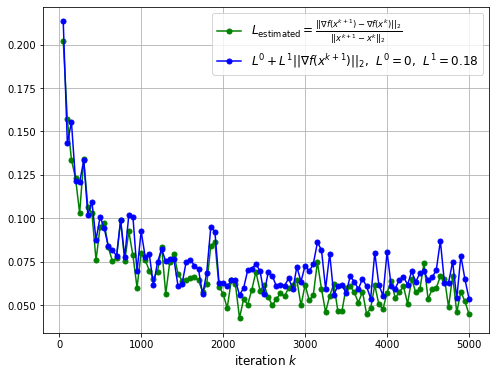

In [88]:
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sample log file path
log_file_path = "log.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"L_estimated:([\d\.]+) norm_grad:([\d\.]+)")

# Read the log file and extract values
with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            L_estimated_values.append(float(match.group(1)))  # Extract and convert to float
            norm_grad_values.append(float(match.group(2)))    # Extract and convert to float

def fit_positive_linear(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    penalty_weight = 10
    
    # Loss function (mean squared error)
    def loss(params):
        a, b = params
        violation = np.maximum(0, y - (a * x + b))  # Capture violations
        penalty = penalty_weight * np.sum(violation ** 2)  # Stronger penalty for violations
        return np.sum((a * x + b - y) ** 2) + penalty
    
    # Initial guess (can be set to 1,1)
    initial_guess = [1.0, 1.0]
    
    # Constraints a > 0, b > 0
    bounds = [(1e-6, None), (1e-6, None)]  # Small threshold to avoid zero
    
    # Run optimization
    result = minimize(loss, initial_guess, bounds=bounds)
    
    return result.x  # Returns [a, b]

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
x = np.arange(50, 5001, 50)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$L_{\mathrm{estimated}} = \frac{||\nabla f(x^{k+1}) - \nabla f(x^k)||_2}{||x^{k+1} - x^{k}||_2}$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label=fr'$L^0 + L^1 ||\nabla f(x^{{k+1}})||_2$,  $L^0 = {b:.0f}$,  $L^1 = {a:.2f}$', 
         color='blue')
plt.xlabel('iteration $k$', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('plot.pdf', format='pdf')
plt.show()